In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [23]:
data = pd.read_csv('../Dataset/Dataset.csv')

data_cleaned = data.dropna(subset=['Details'])

# Sort the DataFrame by the 'Place' column
data_cleaned_sorted = data_cleaned.sort_values(by='Country', ascending=True)

# Display the first 2 rows of the sorted DataFrame
data_cleaned_sorted.head(3)

,Country,Place,Details,Class,WordCountBeforeCleaning
0,Africa,Signal Hill,Signal Hill is located on the side of Table Mo...,None Related,168
28,Africa,Kruger National Park,Kruger National Park is located in South Afric...,None Related,40
29,Africa,Duiker Island,South African Seal Island is a small island lo...,None Related,82


In [24]:
## Download NLTK resources (run only once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
selected = data_cleaned_sorted.copy

# Preprocess the 'Details' column
stop_words = set(nltk.corpus.stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'also', 'located', 'many', 'one', 'see', 'built', 'african', 'africa', 'people', 'take'}
stop_words.update(custom_stop_words)

# Function for cleaning text data
def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the clean_text function to the 'Details' column
data['Details'] = data['Details'].apply(clean_text)
data.to_csv('CleanedData.csv', index=False)
# Display the cleaned DataFrame
print(data)

            Country                  Place  \
0            Africa            Signal Hill   
1            Africa     Alexandria Library   
2            Africa        Pompey's Pillar   
3            Africa  Nairobi National Park   
4            Africa         Giraffe Centre   
..              ...                    ...   
745  United Kingdom          PrecisionLife   
746     Switzerland        Sophia Genetics   
747   United States              SpIntellx   
748   United States                 Tempus   
749           Ghana       Yemaachi Biotech   

                                               Details          Class  \
0    signal hill side table mountain named firing c...   None Related   
1    futuristic building reading place seat reader ...   None Related   
2    pompeii column tower ruin temple serapeum requ...   None Related   
3    nairobi national park kilometer south nairobi ...   None Related   
4    giraffe center home endangered rothschild gira...   None Related   
..       

In [26]:
column_to_read = ['Country', 'Place', 'Details', 'Class', 'WordCountBeforeCleaning']
selected = data[column_to_read].copy()

# Add a new column 'Word_Count_After' to store the word count for each row
selected['WordCountAfterCleaning']  = selected['Details'].apply(lambda x: len(str(x).split()))
# selected.to_csv('CleanedData.csv', index=False)
selected

,Country,Place,Details,Class,WordCountBeforeCleaning,WordCountAfterCleaning
0,Africa,Signal Hill,signal hill side table mountain named firing c...,None Related,168,91
1,Africa,Alexandria Library,futuristic building reading place seat reader ...,None Related,147,78
2,Africa,Pompey's Pillar,pompeii column tower ruin temple serapeum requ...,None Related,193,98
3,Africa,Nairobi National Park,nairobi national park kilometer south nairobi ...,None Related,53,29
4,Africa,Giraffe Centre,giraffe center home endangered rothschild gira...,None Related,193,107
...,...,...,...,...,...,...
745,United Kingdom,PrecisionLife,precision medicine company patented deep seman...,Biotechnology,107,67
746,Switzerland,Sophia Genetics,sophia genetics medicine software company head...,Biotechnology,44,26
747,United States,SpIntellx,spintellx computational system pathology compa...,Biotechnology,43,29
748,United States,Tempus,technology company building world largest libr...,Biotechnology,25,15


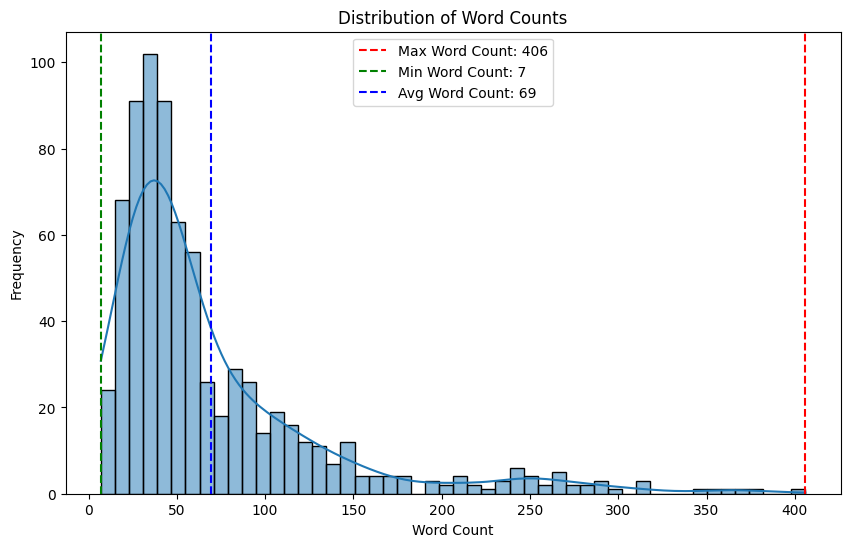

In [27]:
# Calculate max, min, and average word counts
max_word_count = selected['WordCountAfterCleaning'].max()
min_word_count = selected['WordCountAfterCleaning'].min()
avg_word_count = selected['WordCountAfterCleaning'].mean()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(selected['WordCountAfterCleaning'], bins=50, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Add vertical lines to indicate max, min, and average word counts
plt.axvline(x=max_word_count, color='red', linestyle='--', label=f'Max Word Count: {max_word_count}')
plt.axvline(x=min_word_count, color='green', linestyle='--', label=f'Min Word Count: {min_word_count}')
plt.axvline(x=avg_word_count, color='blue', linestyle='--', label=f'Avg Word Count: {avg_word_count:.0f}')

# Show legend
plt.legend()

# Save the plot as an image (PNG format)
plt.savefig('word_count_distribution.png')

# Show the plot
plt.show()


Processing Class: None Related
Class: None Related, Plotted Words: {'world', 'park', 'lake', 'area', 'side', 'beautiful', 'building', 'meter', 'enjoy', 'sea', 'famous', 'mountain', 'city', 'small', 'island', 'addition', 'museum', 'tourist', 'place', 'water'}


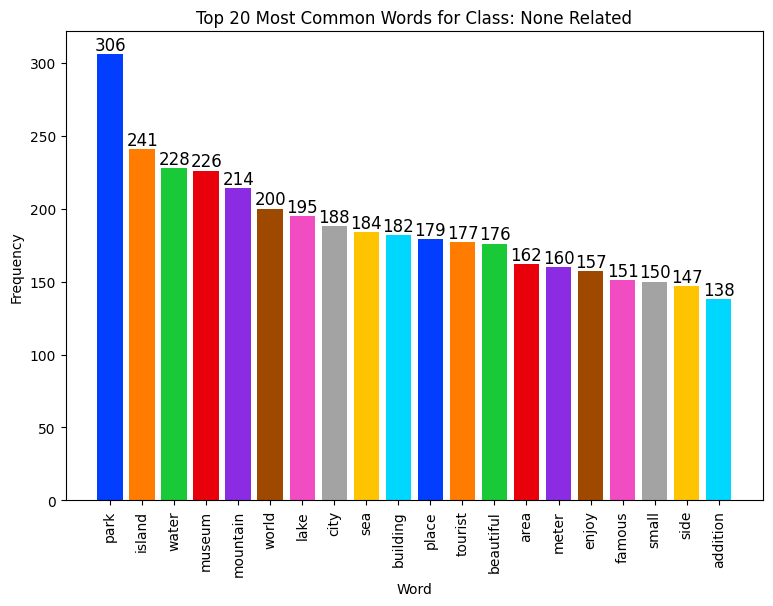


Processing Class: Biotechnology
Class: Biotechnology, Plotted Words: {'therapeutic', 'world', 'park', 'lake', 'area', 'vaccine', 'treatment', 'technology', 'discovery', 'platform', 'side', 'beautiful', 'building', 'meter', 'enjoy', 'sea', 'development', 'famous', 'pharmaceutical', 'data', 'research', 'mountain', 'city', 'small', 'therapy', 'product', 'drug', 'island', 'medical', 'addition', 'museum', 'tourist', 'focus', 'place', 'biotechnology', 'water', 'cancer', 'medicine', 'disease', 'developing'}


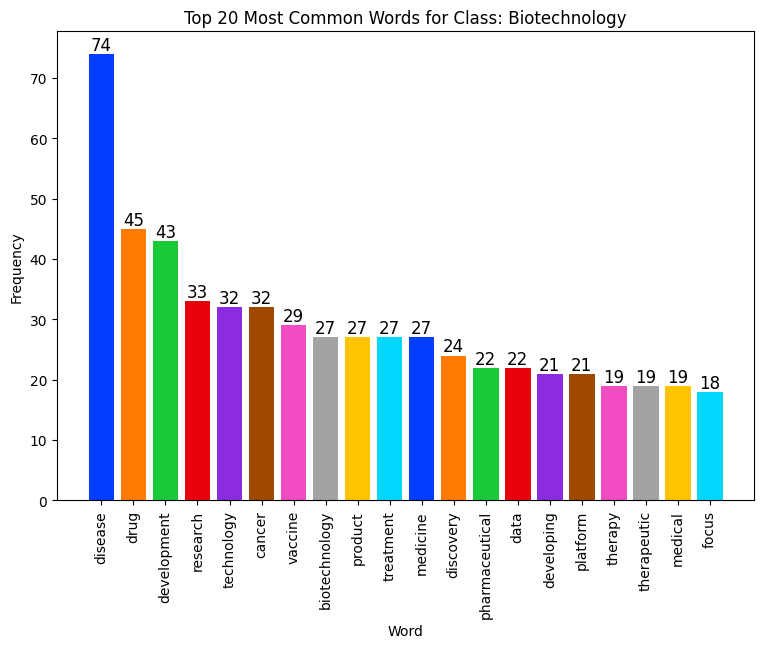


Processing Class: Robotic
Class: Robotic, Plotted Words: {'therapeutic', 'world', 'park', 'lake', 'like', 'help', 'area', 'vaccine', 'treatment', 'technology', 'discovery', 'platform', 'machine', 'robotic', 'side', 'beautiful', 'building', 'manufacturing', 'meter', 'enjoy', 'task', 'sea', 'development', 'famous', 'pharmaceutical', 'data', 'research', 'mountain', 'robot', 'robotics', 'automation', 'application', 'industrial', 'used', 'city', 'system', 'small', 'autonomous', 'industry', 'operation', 'vehicle', 'ai', 'therapy', 'product', 'sensor', 'drug', 'island', 'medical', 'addition', 'museum', 'tourist', 'focus', 'place', 'biotechnology', 'solution', 'water', 'cancer', 'medicine', 'disease', 'developing'}


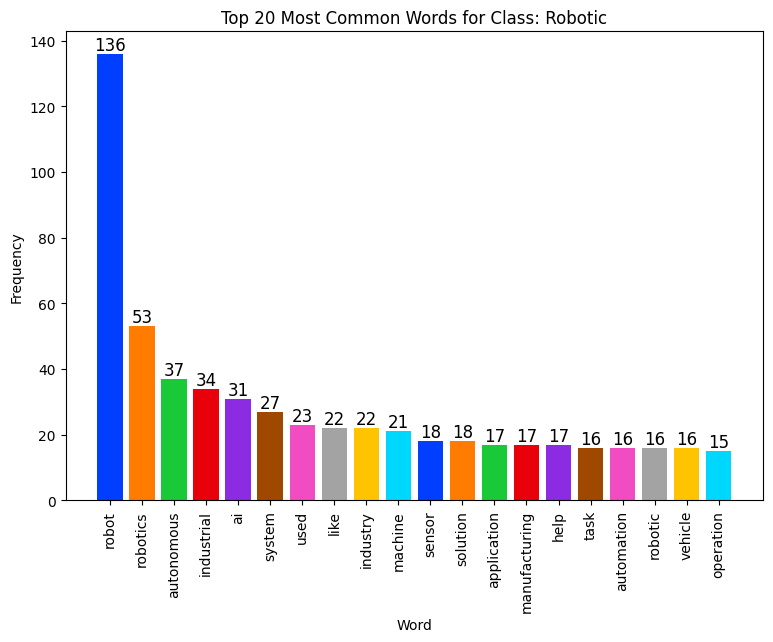


Processing Class: Aerospace
Class: Aerospace, Plotted Words: {'like', 'mission', 'beautiful', 'manufacturing', 'industry', 'contractor', 'sensor', 'commercial', 'island', 'aircraft', 'medical', 'space', 'biotechnology', 'medicine', 'satellite', 'defense', 'area', 'machine', 'side', 'building', 'sea', 'robotics', 'famous', 'research', 'mountain', 'robot', 'application', 'spacecraft', 'industrial', 'used', 'system', 'ai', 'tourist', 'government', 'water', 'cancer', 'developing', 'lake', 'help', 'treatment', 'platform', 'robotic', 'production', 'development', 'automation', 'data', 'city', 'small', 'operation', 'vehicle', 'multinational', 'therapy', 'product', 'advanced', 'flight', 'military', 'place', 'solution', 'aerospace', 'engine', 'disease', 'task', 'therapeutic', 'world', 'park', 'service', 'vaccine', 'discovery', 'technology', 'aviation', 'meter', 'enjoy', 'pharmaceutical', 'autonomous', 'drug', 'provides', 'addition', 'museum', 'corporation', 'focus'}


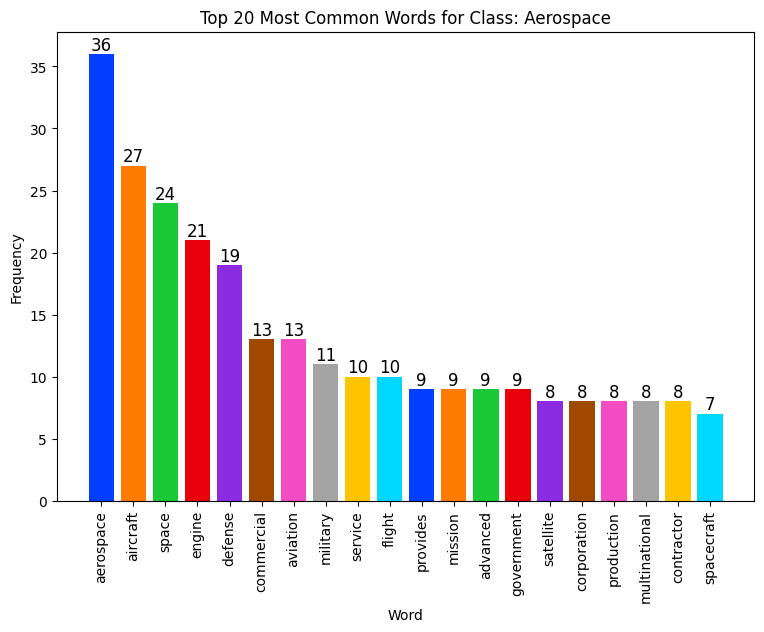

In [28]:
# Assuming you have already loaded your data and spaCy model
data = pd.read_csv('CleanedData.csv')
nlp = spacy.load("en_core_web_sm")

# Initialize a global set to keep track of all words plotted
plotted_words_all = set()

# Get unique values from the 'Class' column
unique_classes = data['Class'].unique()

# Iterate over unique classes and create bar charts
for class_value in unique_classes:
    print(f"\nProcessing Class: {class_value}")
    
    # Filter data for the specific class
    class_data = data[data['Class'] == class_value]

    # Most Common Words for the current class
    all_words = ' '.join(class_data['Details']).split()
    
    # Exclude words containing 'company' and already plotted words
    word_counts = Counter(word.strip("',") for word in all_words if 'company' not in word.lower())
    most_common_words = []
    for word, count in word_counts.most_common():
        if word.lower() not in plotted_words_all:
            most_common_words.append((word, count))
            plotted_words_all.add(word.lower())
        if len(most_common_words) == 20:
            break
    
    # Extract words and counts
    words, counts = zip(*most_common_words)
    
    print(f"Class: {class_value}, Plotted Words: {plotted_words_all}")


    
    # Get a list of bright colors from Seaborn
    bright_colors = sns.color_palette("bright", n_colors=len(most_common_words))
    
    # Plot for the current class
    plt.figure(figsize=(9, 7))
    bars = plt.bar(words, counts, color=bright_colors)
    plt.title(f'Top 20 Most Common Words for Class: {class_value}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

    # Annotate each bar with its count
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.0f}', 
                ha='center', va='bottom', fontsize=12, color='black')

    # Increase the bottom margin to create more space
    plt.subplots_adjust(bottom=0.21)  # Adjust the value as needed

    # Disable the grid
    plt.grid(False)

    # Save the plot as an image (PNG format) with a transparent background
    plt.savefig(f'most_common_words_class_{class_value}.png')
    plt.show()


In [29]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming you have already loaded your data
data = pd.read_csv('CleanedData.csv')

# Extract 'Details' column
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the 'Details' column
docs = column_to_read.apply(nlp)

# Named Entity Recognition for Organization and Location
organization_entities = []
location_entities = []

for doc in docs:
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            organization_entities.append(ent.text)
        elif ent.label_ == 'LOC' or ent.label_ == 'GPE':
            location_entities.append(ent.text)

# Display the most common Organization entities
most_common_organizations = Counter(organization_entities).most_common(15)
print("\nMost Common Organizations:")
for org, count in most_common_organizations:
    print(f"{org}: {count} times")

# Display the most common Location entities
most_common_locations = Counter(location_entities).most_common(10)
print("\nMost Common Locations:")
for loc, count in most_common_locations:
    print(f"{loc}: {count} times")


Most Common Organizations:
red house: 5 times
greenery: 5 times
white house: 4 times
lotus: 4 times
signal hill: 3 times
senate: 3 times
ipanema: 3 times
nasa: 3 times
paris france: 2 times
unesco: 2 times
shop gallery: 2 times
kuta beachfantasy: 2 times
waterfall canyon: 2 times
roppongi hill: 2 times
fox: 2 times

Most Common Locations:
paris: 79 times
new zealand: 38 times
osaka: 23 times
france: 22 times
tokyo: 22 times
malaysia: 22 times
japan: 21 times
kuala lumpur: 20 times
indonesia: 17 times
egypt: 15 times


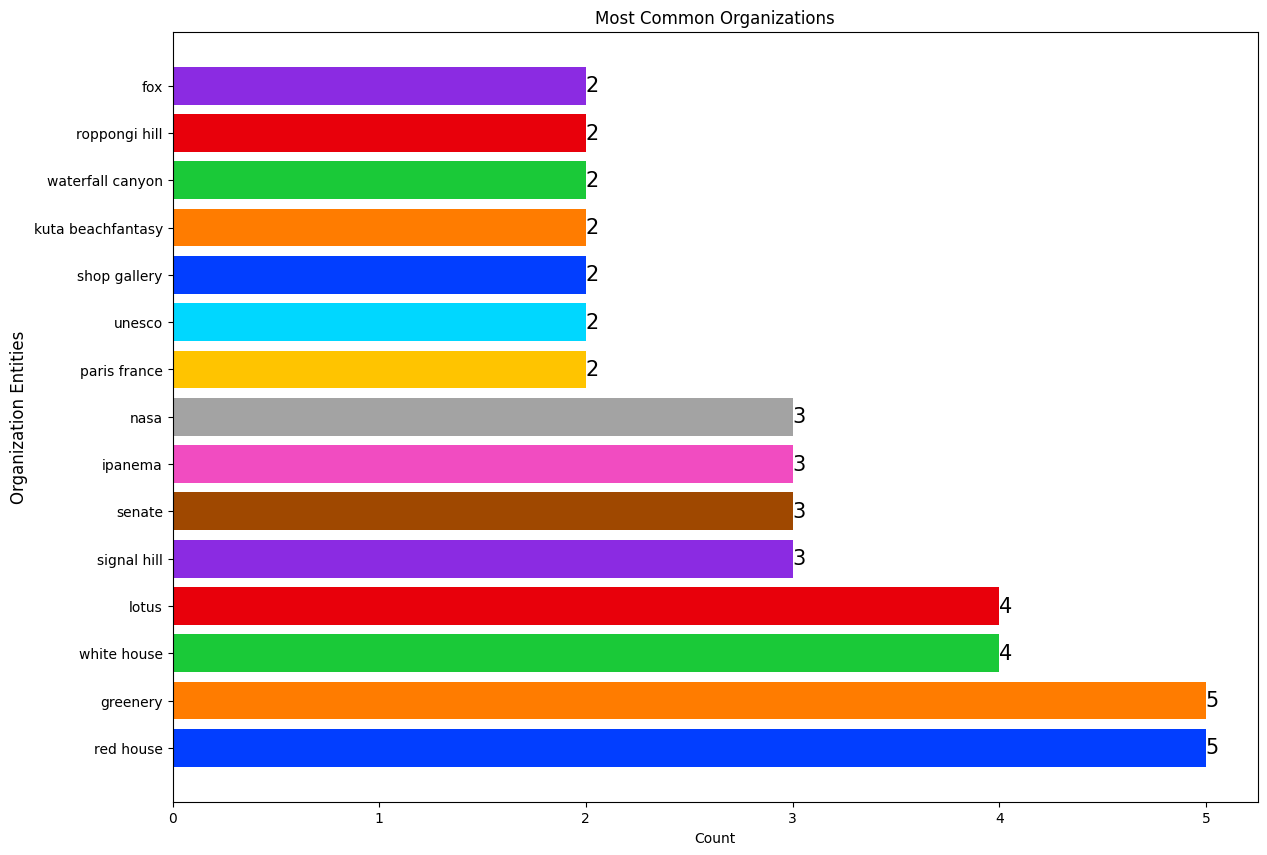

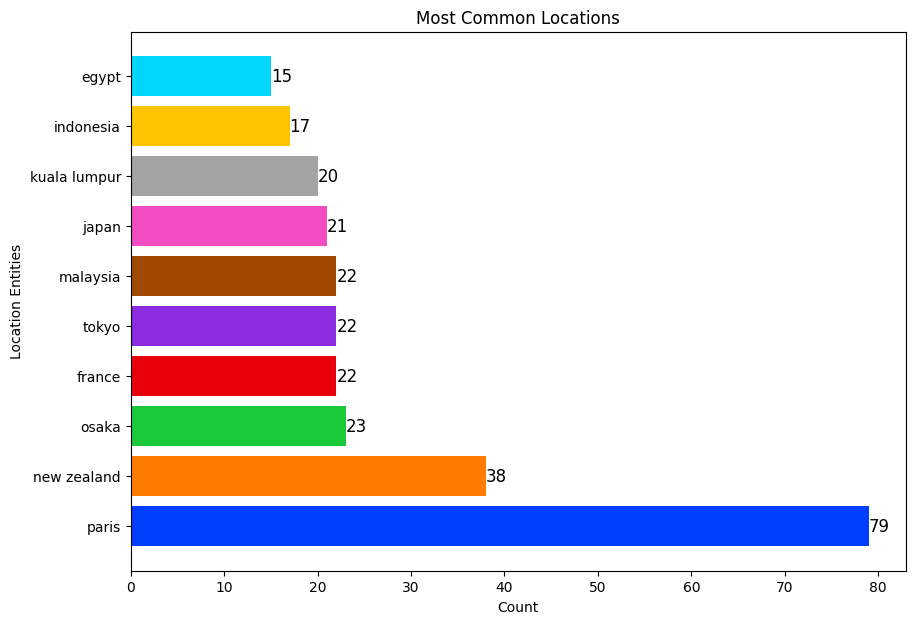

In [30]:
# Get a list of bright colors from Seaborn
bright_colors = sns.color_palette("bright", n_colors=len(most_common_organizations))

plt.figure(figsize=(14, 10))
bars = plt.barh([org[0] for org in most_common_organizations], [count[1] for count in most_common_organizations], color=bright_colors)
plt.xlabel('Count')
plt.ylabel('Organization Entities', fontsize=12)
plt.title('Most Common Organizations')

# Annotate each bar with its count and use a smaller font size for organizations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=15, color='black')
# Disable the grid
plt.grid(False)
# Save the plot as an image (PNG format)
plt.savefig('most_common_organizations.png')
plt.show()


plt.figure(figsize=(10, 7))
bars = plt.barh([loc[0] for loc in most_common_locations], [count[1] for count in most_common_locations], color=bright_colors[:len(most_common_locations)])
plt.xlabel('Count')
plt.ylabel('Location Entities')
plt.title('Most Common Locations')

# Annotate each bar with its count
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=12, color='black')
# Disable the grid
plt.grid(False)
# Save the plot as an image (PNG format)
plt.savefig('most_common_locations.png')
plt.show()

In [31]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming you have already loaded your data
data = pd.read_csv('CleanedData.csv')

# Extract 'Details' column
column_to_read = data['Details']

# Initialize lists to store organization and location entities for each row
all_organization_entities = []
all_location_entities = []

# Iterate through each row in the 'Details' column
for index, row in data.iterrows():
    doc = nlp(row['Details'])

    # Named Entity Recognition for Organization and Location in each row
    organization_entities = set()  # Use a set to store unique entities
    location_entities = set()

    for ent in doc.ents:
        if ent.label_ == 'ORG':
            organization_entities.add(ent.text)
        elif ent.label_ == 'LOC' or ent.label_ == 'GPE':
            location_entities.add(ent.text)

    # Append organization and location entities for the current row to the lists
    all_organization_entities.append(organization_entities)
    all_location_entities.append(location_entities)

# Create a DataFrame to display organization and location entities for each row
result_df = pd.DataFrame({
    'Country': data['Country'],
    'Place': data['Place'],
    'Details': data['Details'],
    'Class': data['Class'],
    'WordCountBeforeCleaning': data['WordCountBeforeCleaning'],
    'Organization Entities': all_organization_entities,
    'Location Entities': all_location_entities
})

# Convert lists to strings without square brackets for 'Organization Entities' and 'Location Entities'
result_df['Organization Entities'] = result_df['Organization Entities'].apply(lambda x: ', '.join(map(str, x)))
result_df['Location Entities'] = result_df['Location Entities'].apply(lambda x: ', '.join(map(str, x)))

# Display the DataFrame
result_df 

,Country,Place,Details,Class,WordCountBeforeCleaning,Organization Entities,Location Entities
0,Africa,Signal Hill,signal hill side table mountain named firing c...,None Related,168,"cannon salvo, signal hill",atlantic
1,Africa,Alexandria Library,futuristic building reading place seat reader ...,None Related,147,,
2,Africa,Pompey's Pillar,pompeii column tower ruin temple serapeum requ...,None Related,193,,aswan
3,Africa,Nairobi National Park,nairobi national park kilometer south nairobi ...,None Related,53,nairobi national,
4,Africa,Giraffe Centre,giraffe center home endangered rothschild gira...,None Related,193,"giraffe rothschild giraffe endangered, rothsch...",kenya
...,...,...,...,...,...,...,...
745,United Kingdom,PrecisionLife,precision medicine company patented deep seman...,Biotechnology,107,,
746,Switzerland,Sophia Genetics,sophia genetics medicine software company head...,Biotechnology,44,,"boston, switzerland, massachusetts"
747,United States,SpIntellx,spintellx computational system pathology compa...,Biotechnology,43,,
748,United States,Tempus,technology company building world largest libr...,Biotechnology,25,,
